In [192]:
# For consistent results 
import numpy as np
import tensorflow as tf
import random as rn
import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

In [193]:
# Load the data
import pandas as pd
# import numpy as np

train_data = pd.read_csv(f"digit-recognizer/train.csv")
# display(train_data.head())

# Separate label and features
y = train_data.label
X = train_data.drop(columns=['label'])
print(X.shape)
print(y.shape)
X.describe()

(42000, 784)
(42000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [194]:
# Make train, cv, test splits
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, train_size=0.5)

print(f"X_train Shape:\t {X_train.shape}")
print(f"y_train Shape:\t {y_train.shape}")
print(f"X_cv Shape:\t {X_cv.shape}")
print(f"y_cv Shape:\t {y_cv.shape}")
print(f"X_test Shape:\t {X_test.shape}")
print(f"y_test Shape:\t {y_test.shape}")

X_train Shape:	 (25200, 784)
y_train Shape:	 (25200,)
X_cv Shape:	 (8400, 784)
y_cv Shape:	 (8400,)
X_test Shape:	 (8400, 784)
y_test Shape:	 (8400,)


In [195]:
# Make Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

normalizeColumns = ColumnTransformer([
    ("normalize_all", StandardScaler(), X_test.columns)
])

pipeline_1 = Pipeline(steps=[
    ("normalize", normalizeColumns)
])

X_train_transformed = pd.DataFrame(pipeline_1.fit_transform(X_train))
X_train_transformed.columns = X_train.columns
X_train_transformed.index = X_train.index
# X_train_transformed.describe()

y_train_transformed = y_train

X_cv_transformed = pd.DataFrame(pipeline_1.transform(X_cv))
X_cv_transformed.columns = X_cv.columns
X_cv_transformed.index = X_cv.index

y_cv_transformed = y_cv

Minimum validation loss: 0.9071102142333984 for lambda: 0.1
Minimum validation loss: 0.971886396408081 for lambda: 0.01
Minimum validation loss: 1.1580768823623657 for lambda: 0.001
Minimum validation loss: 0.9505240321159363 for lambda: 0.3
Minimum validation loss: 0.7368911504745483 for lambda: 0.5


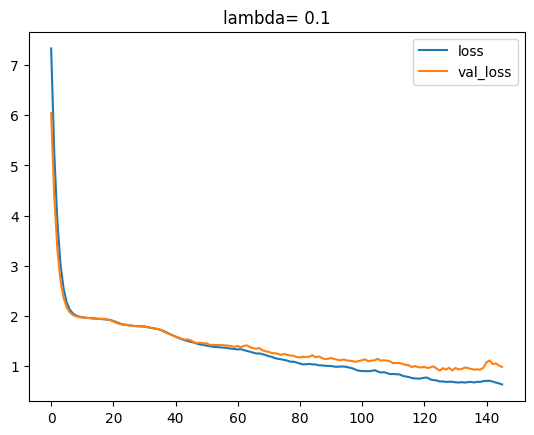

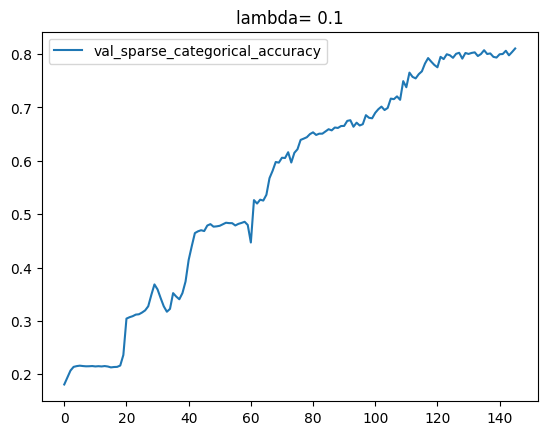

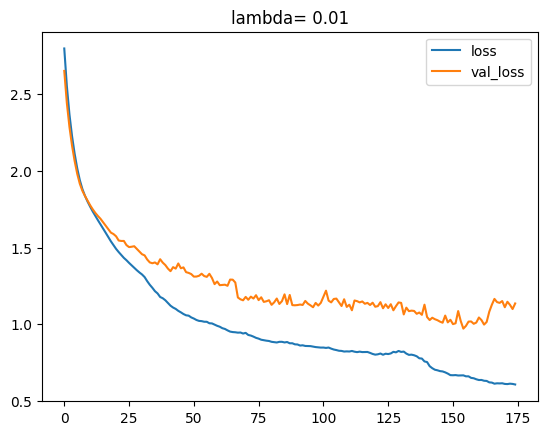

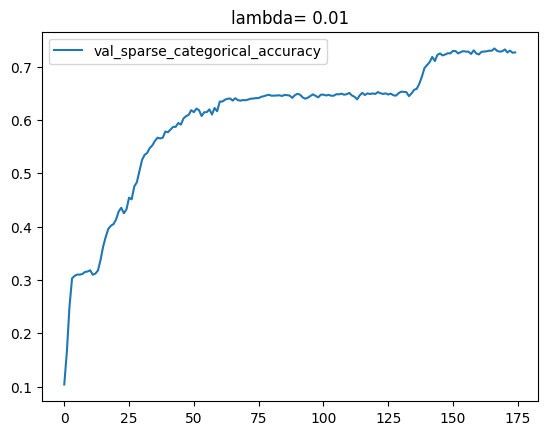

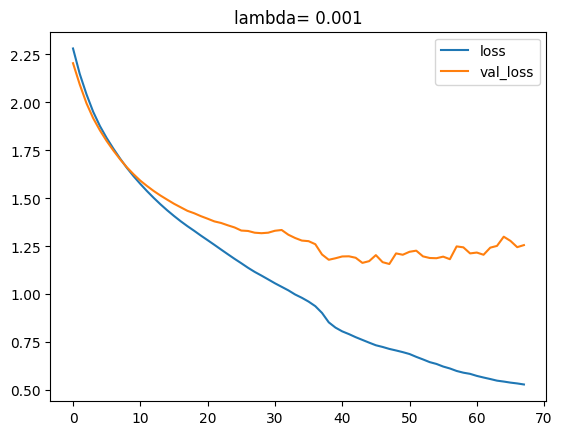

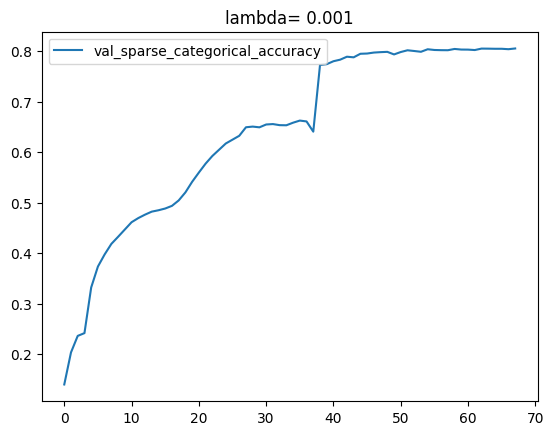

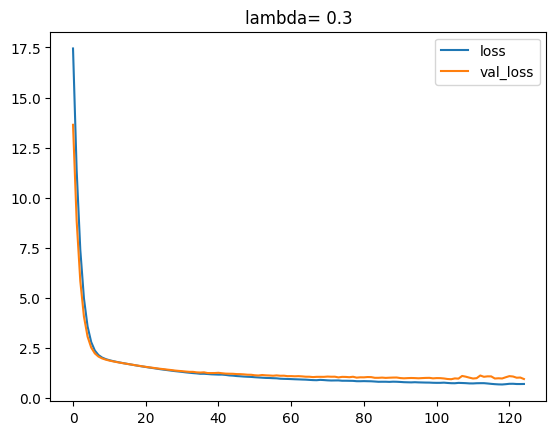

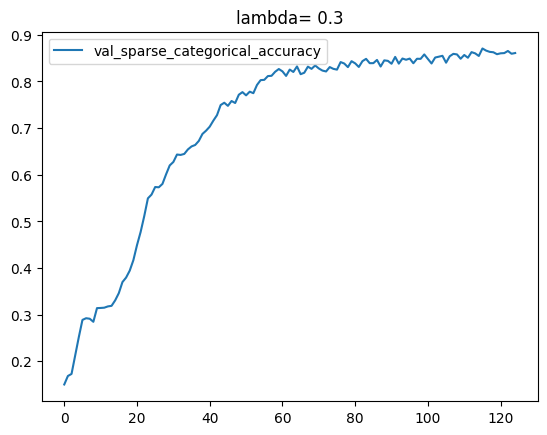

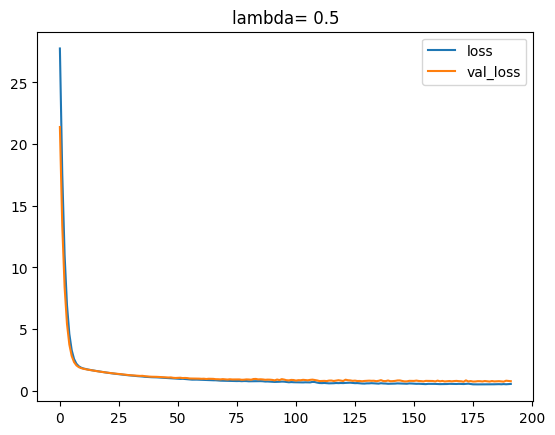

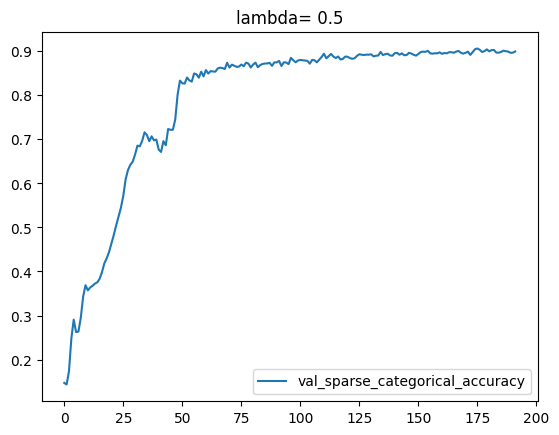

In [268]:
# Train model, find best value of lambda
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy


for _lambda in [0.1, 0.01, 0.001, 0.3, 0.5]:
    model_1 = Sequential([
        Input(shape=(784,)),
        Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(_lambda), name='L1'),
        Dense(units=16, activation='relu', name='L2'),
        Dense(units=8, activation='relu', name='L3'),
        Dense(units=4, activation='relu', name='L4'),
        Dense(units=2, activation='relu', name='L5'),
        Dense(units=10, activation='linear', name='L6'),
    ])

    model_1.compile(
        optimizer='adam',
        loss=SparseCategoricalCrossentropy(from_logits=True),
        metrics=[SparseCategoricalAccuracy]
    )

    early_Stopping = EarlyStopping(
        patience=20,
        min_delta=0.001,
        restore_best_weights=True
    )

    history=model_1.fit(X_train_transformed, y_train_transformed, 
                epochs=800,
                validation_data=(X_cv_transformed, y_cv_transformed),
                callbacks=[early_Stopping],
                batch_size=2048,
                verbose=False
                )

    # Plot 
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss','val_loss']].plot(title=f'lambda= {_lambda}')
    history_df.loc[:, ['val_sparse_categorical_accuracy']].plot(title=f'lambda= {_lambda}')
    print(f"Minimum validation loss: {history_df['val_loss'].min()} for lambda: {_lambda}")


In [262]:
# Intermediary Testing

model_1_5 = Sequential([
    Input(shape=(784,)),
    Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name='L1'),
    Dense(units=16, activation='relu', name='L2'),
    Dense(units=8, activation='relu', name='L3'),
    Dense(units=4, activation='relu', name='L4'),
    Dense(units=2, activation='relu', name='L5'),
    Dense(units=10, activation='linear', name='L6'),
])

model_1_5.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=[SparseCategoricalAccuracy]
)

early_Stopping = EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True
)

history=model_1_5.fit(X_train_transformed, y_train_transformed, 
            epochs=500,
            validation_data=(X_cv_transformed, y_cv_transformed),
            callbacks=[early_Stopping],
            batch_size=2048,
            # verbose=False
            )


Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 7.8457 - sparse_categorical_accuracy: 0.1253 - val_loss: 6.0609 - val_sparse_categorical_accuracy: 0.1576
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6108 - sparse_categorical_accuracy: 0.1581 - val_loss: 4.4125 - val_sparse_categorical_accuracy: 0.1694
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1271 - sparse_categorical_accuracy: 0.1647 - val_loss: 3.3680 - val_sparse_categorical_accuracy: 0.1768
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1994 - sparse_categorical_accuracy: 0.1747 - val_loss: 2.7418 - val_sparse_categorical_accuracy: 0.1805
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6499 - sparse_categorical_accuracy: 0.1795 - val_loss: 2.3806 - val_sparse_categorical_accuracy: 0.1815
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3347 - sparse_categorical_accuracy: 0.1951 - val_loss: 2.1747 - val_sparse_categorical_accuracy: 0.2298
Epoch 7/5

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])
Minimum validation loss: 1.053572654724121


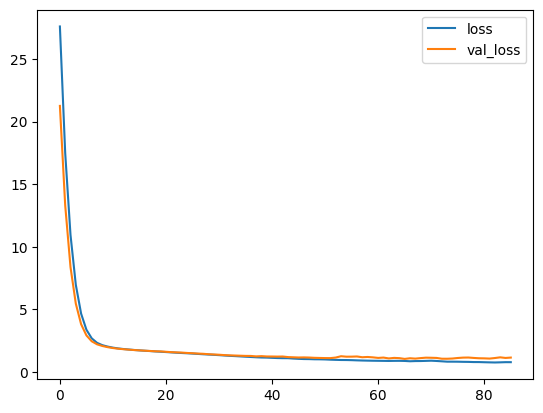

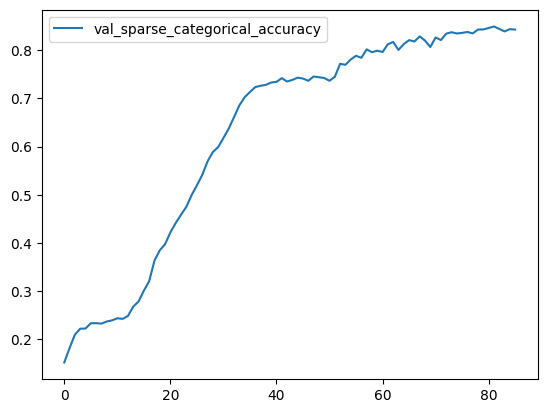

In [267]:
# Plot
history_df = pd.DataFrame(history.history)
print(history.history.keys())
history_df.loc[:, ['loss','val_loss']].plot()
history_df.loc[:, ['val_sparse_categorical_accuracy']].plot()
print(f"Minimum validation loss: {history_df['val_loss'].min()}")

Epoch 1/800
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 18.8559 - sparse_categorical_accuracy: 0.1046 - val_loss: 13.6476 - val_sparse_categorical_accuracy: 0.1239
Epoch 2/800
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.3500 - sparse_categorical_accuracy: 0.1257 - val_loss: 8.8870 - val_sparse_categorical_accuracy: 0.1321
Epoch 3/800
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0663 - sparse_categorical_accuracy: 0.1426 - val_loss: 5.9274 - val_sparse_categorical_accuracy: 0.1642
Epoch 4/800
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4397 - sparse_categorical_accuracy: 0.1716 - val_loss: 4.1924 - val_sparse_categorical_accuracy: 0.1880
Epoch 5/800
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9152 - sparse_categorical_accuracy: 0.1901 - val_loss: 3.2178 - val_sparse_categorical_accuracy: 0.1948
Epoch 6/800
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0644 - sparse_categorical_accuracy: 0.1934 - val_loss: 2.6829 - val_sparse_categorical_accuracy: 0.1957
Epoch 

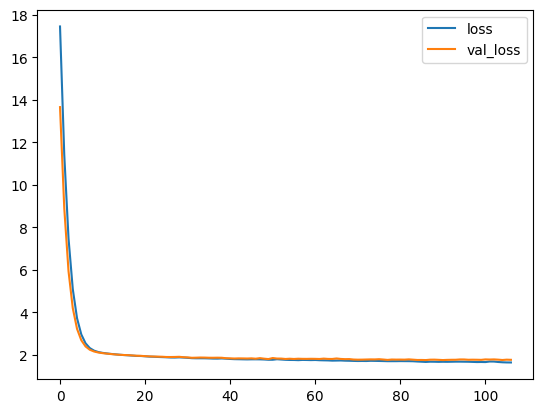

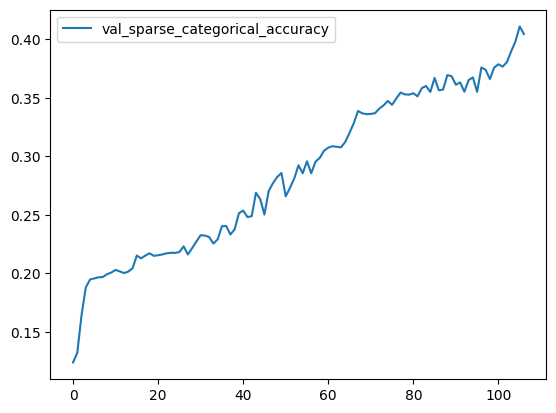

In [279]:
# Train Intermediate model, report your models error
X_test_transformed = pd.DataFrame(pipeline_1.transform(X_test))
X_test_transformed.columns = X_test.columns
X_test_transformed.index = X_test.index

y_test_transformed = y_test

model_2 = Sequential([
        Input(shape=(784,)),
        Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.3), name='L1'),
        Dense(units=16, activation='relu', name='L2'),
        Dense(units=8, activation='relu', name='L3'),
        Dense(units=4, activation='relu', name='L4'),
        Dense(units=2, activation='relu', name='L5'),
        Dense(units=10, activation='linear', name='L6'),
    ])

model_2.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=[SparseCategoricalAccuracy]
)

early_Stopping = EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True
)

history=model_2.fit(X_train_transformed, y_train_transformed, 
            epochs=800,
            validation_data=(X_test_transformed, y_test_transformed),
            callbacks=[early_Stopping],
            batch_size=2048,
            # verbose=False
            )

# Plot 
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot()
history_df.loc[:, ['val_sparse_categorical_accuracy']].plot()
print(f"Minimum validation loss: {history_df['val_loss'].min()}")

Epoch 1/185
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 17.6447 - sparse_categorical_accuracy: 0.1452
Epoch 2/185
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8594 - sparse_categorical_accuracy: 0.1114 
Epoch 3/185
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7029 - sparse_categorical_accuracy: 0.1649
Epoch 4/185
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9685 - sparse_categorical_accuracy: 0.2407
Epoch 5/185
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2787 - sparse_categorical_accuracy: 0.2658
Epoch 6/185
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0019 - sparse_categorical_accuracy: 0.2849
Epoch 7/185
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8824 - sparse_categorical_accuracy: 0.2975
Epoch 8/185
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8137 - sparse_categorical_accuracy: 0.3050
Epoch 9/185
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7624 - sparse_categorical_accuracy: 0.3092
Epoch 10/185
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.

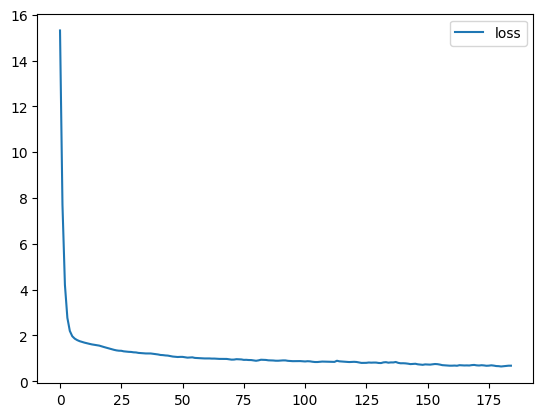

In [280]:
# My Model's Reported Accuracy is: 0.89 (approx, from runs above)
# Train the final model on the entire data

X_full_transformed = pd.DataFrame(pipeline_1.transform(X))
X_full_transformed.columns = X.columns
X_full_transformed.index = X.index

y_full_transformed = y

model_final = Sequential([
        Input(shape=(784,)),
        Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.3), name='L1'),
        Dense(units=16, activation='relu', name='L2'),
        Dense(units=8, activation='relu', name='L3'),
        Dense(units=4, activation='relu', name='L4'),
        Dense(units=2, activation='relu', name='L5'),
        Dense(units=10, activation='linear', name='L6'),
    ])

model_final.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=[SparseCategoricalAccuracy]
)

# early_Stopping = EarlyStopping(
#     patience=20,
#     min_delta=0.001,
#     restore_best_weights=True
# )

history=model_final.fit(X_full_transformed, y_full_transformed, 
            epochs=185,
            # validation_data=(X_cv_transformed, y_cv_transformed),
            # callbacks=[early_Stopping],
            batch_size=2048,
            # verbose=False
            )

# Plot 
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot()
# history_df.loc[:, ['val_sparse_categorical_accuracy']].plot()
# print(f"Minimum validation loss: {history_df['val_loss'].min()}")

# predict results
test = pd.read_csv("digit-recognizer/test.csv")
X_real_test = pd.DataFrame(pipeline_1.transform(test))
X_real_test.columns = test.columns
X_real_test.index = test.index

results = model_final.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("./predictions/try3_25Oct24.csv",index=False)
